# Исследование рынка компьютерных игр

Данная работа посвящена исследованию продаж компьютерных игр. Цель проекта - выявить закономерности, определяющие успешность игры.
Были изучены такие данные, как оценки пользователей и экспертов, жанры и платформы. Данные прошли необходимую предобработку.

На этапе исследовательского анализа данных были выполнены следующие задачи: 
* определен актуальный период, который можно взять за основу для дальнейшего прогноза продаж;
* выявлены несколько потенциально прибыльных платформ;
* дана оценка распределению глобальных продаж;
* проверено наличие взаимосвязи между продажами и оценками критиков и пользователей;
* проанализировано общее распределение игр по жанрам.

Также был составлен портрет каждого региона продаж и выявлены:
* Самые популярные платформы (топ-5);
* Самые популярные жанры (топ-5);
* Влияние рейтинга ESRB на продажи в разных регионах.

Кроме того, мы выдвинули гипотезы и провели их статистическую проверку:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action и Sports разные.

В общем выводе сформулированы основные результаты и рекомендации, которые помогут выбрать потенциально популярный продукт и спланировать рекламные кампании.

## Основная информация о данных

In [1]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
# импорт данных
games = pd.read_csv('games.csv')

In [2]:
games # вывод первых и последних строк на экран

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
games.info() # получение основной ифнормации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Наши данные представлены типами float и object. 

Тип object имеют столбцы с названием игры, платформы, жанром и рейтингом, который представляет собой аббревиатуру. Это корректный тип для таких данных.

В некоторых случаях тип float нужно будет преобразовать в целочисленный тип int. Например, год выпуска или оценка критиков - это целое число. В свою очередь количетсво продаж и оценка пользователей даны в виде десятичной дроби. Такие значения округлять не будем, чтобы не терять точность вычислений.

В датафрейме 16 715 строк и 11 столбцов, но в них разное количество значений. Это значит, что в данных есть пропуски.
Посмотрим, в каких строках нет данных о названии игры.

In [4]:
games[games['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Название игры и ее жанр остутствуют всего в двух сторках. Эти данные могли пропасть из-за технической ошибки в ходе выгрузки. 
Если бы были известные названия игр, можно было бы заполнить и их жанр. Но т.к. этой информации нет и таких строк всего две, можно их удалить. 

Не для всех игр известен год выпуска. Можно обратиться к коллегам, чтобы они проверили и доработали выгрузку данных, т.к. такая информация наверняка есть в открытом доступе. Но если строк с пропусками в этом столбце немного, то можно их удалить без потерь для анализа и сэкономить время.

In [5]:
missing_values = len(games[games['Year_of_Release'].isna()])/len(games)
print('Доля пропусков в столбце "Год выпуска": {:.2%}'.format(missing_values))

Доля пропусков в столбце "Год выпуска": 1.61%


Строк с пропусками в годе выпуска меньше 2%, поэтому для экономии времени можно их удалить, потеря данных не будет существенной.

Также есть пропуски данных об оценках критиков, пользователей и рейтинге. Вероятнее всего этих данных не было в  открытом доступе - например, игра не была оценена пользователями. Таких пропусков довольно много, поэтому не будем их удалять, чтобы не потерять слишком много данных. 

Проверим, есть ли среди дубликаты среди названий игр. Методом duplicated() выведем на экран повторяющиеся названия на одних и тех же платформах, c одинаковым годом выпуска.

In [6]:
games[games[['Name', 'Platform', 'Year_of_Release']].duplicated()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


Найдено всего два дубликата. Скорее всего, они возникли из-за ошибки ввода или задвоились при выгрузке. Таких данных немного, проэтому удалим их.

### Вывод

Первое знакомство с данными показывает, что необходимо провести их предобработку, а именно:
* привести названия столбцов к нижнему регистру для удобства работы с датафреймом;
* удалить строки с пропусками в столбцах Name, Genre и Year_of_Release;
* заполнить пропуски в столбцах Critic_score, User_score и Rating;
* удалить дубликаты;
* преобразовать данные в удобный для работы тип.

## Подготовка данных

### Замена названий столбцов

Приведем названия столбцов к нижнему регистру методом str.lower():

In [7]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка пропусков, дубликатов и преобразование типа данных

Удалим пропуски в столбцах 'year_of_release', 'genre'

In [8]:
games.dropna(subset = ['year_of_release', 'genre'], inplace = True)

Теперь можно преобразовать год выпуска в тип данных int.

In [9]:
games['year_of_release'] = games['year_of_release'].astype(int)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Удалим дубликаты:

In [10]:
games = games.drop_duplicates(subset=('name', 'platform', 'year_of_release'))

Обработаем пропуски в столбцах с оценкой критиков. Для начала найдем минимальную оценку:

In [11]:
games['critic_score'].min()

13.0

Минимальная оценка - 13 баллов. Т.к. у нас нет оценки 0, можно заменить пропуски нулем и далее во время анализа понимать, что 0 означает отстуствие данных. Затем преобразуем все значения в тип int.

In [69]:
games.loc[:'critic_score'] = games['critic_score'].fillna(0) # заполнение пропусков 0

In [13]:
games.loc[:, 'critic_score'] = games['critic_score'].astype(int) # преобразование типа данных

Посмотрим на значения пользовательских оценок, отсортированных по возрастанию.

In [14]:
games['user_score'].value_counts().sort_values()

9.7       1
0         1
0.7       2
0.3       2
1.5       2
       ... 
8.3     252
8.2     276
8       285
7.8     322
tbd    2376
Name: user_score, Length: 96, dtype: int64

Среди оценок пользователей всего 1 ноль, поэтому предлагаем пропуски заполнить нулями как и в случае с оценкой критиков, и считать, что это обозначает отсутствие данных. 

В некоторых случаях вместо оценки проставлена аббревиатура tbd - это значит, что оценка будет добавлена позже. Т.к. на момент исследования оценки нет, заменим tbd на ноль.

In [15]:
games.loc[:, 'user_score'] = games['user_score'].fillna(0)
games.loc[:, 'user_score'] = games['user_score'].replace('tbd', 0)

Из-за наличия аббревиатуры тип данных столбца user_score был object. Чтобы в дальнейшем мы могли проводить расчеты с участием этого столбца, преобразуем его во float.

In [16]:
games.loc[:, 'user_score'] = games['user_score'].astype(float)

Посомтрим на уникальные значения рейтинга ESRB:

In [17]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Рейтинг представлен аббревиатурами:
* E - everyone (для всех)
* M - mature 17+ (для взрослых от 17 лет)
* T - teen (для подростков)
* E10+ - everyone 10+ (для всех, старше 10 лет)
* К-А - kids to adults (для детей и взрослых, данный рейтинг был заменен на E в 1998 году)
* АО - adults only (только для взрослых)
* RP - rating pending (рейтинг ожидается)
* EC - early childhood (для детей от 3 лет)
* nan - пропуски в данных

Вероятно, пропуски в рейтинге возникли из-за того, что в используемых открытых источниках не было этой информации. Для более точного анализа рекомендуется найти дополнительные источники, чтобы заполнить пропуски. Мы заменим пропуски аббревиатурой NR (not rated, нет рейтинга), чтобы данные было удобнее групировать по рейтингу.

In [18]:
games.loc[:, 'rating'] = games['rating'].fillna('NR')

Проверим результаты предобработки.

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
name               16443 non-null object
platform           16443 non-null object
year_of_release    16443 non-null int32
genre              16443 non-null object
na_sales           16443 non-null float64
eu_sales           16443 non-null float64
jp_sales           16443 non-null float64
other_sales        16443 non-null float64
critic_score       16443 non-null int32
user_score         16443 non-null float64
rating             16443 non-null object
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


Теперь все данные имеют корректный тип. Пропуски были удалены или заполенны.

На следующем шаге будут изучены продажи игр. Для этого добавим столбец с общими продажами total_sales.

In [73]:
games['total_sales'] = games['na_sales']+games['eu_sales']+games['jp_sales']+games['other_sales']

In [21]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,NR,31.38


Теперь можно приступать к исследовательскому анализу данных.

## Исследовательский анализ данных


### Анализ общего выпуска игр.


Построим график общего выпуска игр по годам.

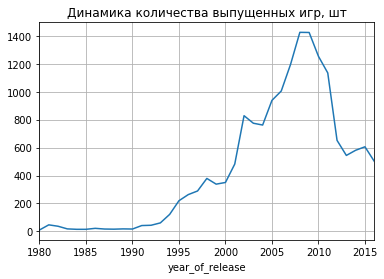

In [22]:
games.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(grid=True, legend=False, title='Динамика количества выпущенных игр, шт');

Судя по графику, за период с 1980 по 1994 год игр выпускалось немного и объемы выпуска почти не менялись. Затем по мере развития технологий количество игр начинает расти, особенно резкий рост наблюдается с 2000 года. В 2007-2008 году после непродолжительного плато выпуск игр начинает резко падать - вероятно, по индустрии ударил Мировой экономический кризис.

Для анализа целесобразно рассматривать период, начиная с 2000 года, когда выпуск игр стал более существенным и продолжал расти.

Найдем платформы с наибольшими суммарными продажами начиная с 2000 года при помощи сводной таблицы.

In [23]:
# сводная таблица с суммарными продажами игр по платформам, сортировка по убыванию продаж
(games.query('year_of_release > 2000').pivot_table(index='platform', 
                                                  values='total_sales', 
                                                  aggfunc='sum')
                                        .sort_values(by='total_sales', ascending=False).head(10))


,total_sales
platform,
PS2,1194.39
X360,961.24
PS3,931.33
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.81
PSP,289.53
3DS,257.81


Построим график продаж по 5 самым прибыльным платформам.

In [24]:
# топ-5 платформ
top_platforms = games.query('year_of_release > 2000').pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index().head(5)

In [25]:
# названия платформ
top_platforms_list = list(top_platforms['platform'].unique())

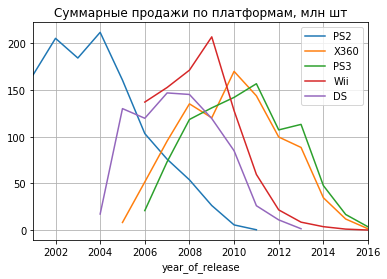

In [26]:
# функция, которая берет название платформы из списка выше и строит график продаж
for element in top_platforms_list:
    games_subest = games.query('year_of_release > 2000')
    graph = games_subest[games_subest['platform'] == element].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    graph['total_sales'].plot(label=element, grid=True);
    plt.legend()
    plt.title('Суммарные продажи по платформам, млн шт')

Можно заметить, что жизненный цикл платформы составляет около 10 лет. В период с 2004 по 2006 год новые платформы появлялись каждый год, друг за другом: DS, X360, Wii, PS3. 

Платформа PS2 появилась в 2000 году и просуществовала 11 лет, но уже с 2004 года объем продаж снижался, а в 2006 году была выпущена платформа следующего поколения - PS3.

Интересно отметить платформу Wii, которая вышла в 2006 году практически с рекордным количеством продаж. Эта платформа - лидер по продажам в 2009 году (чуть больше 200 млн копий).

Как было отмечено на графике общих продаж, в послекризисные годы объемы пподаж падают для каждой платформы.

Из пяти крупнейшних платформ потенциально прибыльными считаем Wii, X360 и PS3, т.к. по остальным платформам продаж не наблюдается с 2013 года.

Мы считаем, что в качестве актуального периода для анализа и прогноза следует взять 2013-2016 год, чтобы в данные для прогноза не попали платформы, которые к началу периода прекратили свою деятельность. Также в этот период у трех крупнейших платформ уже пройден пик жизненного цикла и наблюдается похожий тренд по уменьшению объема продаж.

Посмотрим на сводную таблицу по продажам в разрезе платформ с 2013 года.

In [27]:
games_subset = games.query('year_of_release > 2013') # срез данных с 2013 года
games_subset.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


В рассматриваемом актуальном периоде тройка лидеров изменилась и представлена PS4, XOne и 3DS.

Посмотрим, как распределены общие продажи на графике боксплот, а также получим описательную статистику методом describe().

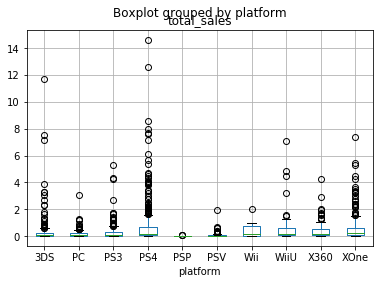

In [28]:
games_subset.sort_values(by='total_sales').boxplot('total_sales', by='platform');

На графике боксплот видно большое наличие выбросов в данных почти по каждой платформе. Одной из причин может быть то, что данные были взяты из открытых источников, в каждом из которых могли использоваться разные единицы измерения количства проданных игр. В таком случае для оценки серднего лучше использовать медиану. Для более точных результатов анализа рекомендуется проверить выгрузку.

На следующем боксплоте ограничим ось У значением 1,5 млн копий, чтобы ближе рассмотреть квартили продаж.

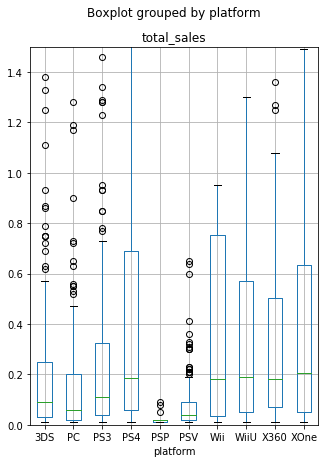

In [29]:
games_subset.sort_values(by='total_sales').boxplot('total_sales', by='platform', figsize=(5,7));
plt.ylim(0,1.5);

Наличие выбросов может исказить результаты анализа, поэтому далее при расчетах будем использовать срез данных - такой диапазон, в котором находится основная часть продаж. Например, для платформы 3DS это диапазон от 57,5 тыс до 690 тыс проданных копий (точные значения квартилей получены методом describe() ниже).

In [30]:
games_subset.query('platform == "PS4"')['total_sales'].describe()

count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

### Анализ влияния оценок на продажи.

Взаимосвязь между продажами и оценками критиков и пользователей поможет оценить коэффициент корреляции. Методом corr() получим попарные коэффициенты корреляции на примере платформы PS4, а для визуальной оценки построим диаграммы рассеяния. Расчеты проведены с учетом недочетов в данных (т.е. мы не рассматриваем игры без оценко, а также ограничиваем диапазон продаж, чтобы не захватывать выбросы).

In [31]:
(
    games_scores = games_subset.query(
        'platform == "PS4" & critic_score > 0 & user_score > 0 & 0.057 < total_sales < 0.69')
        .loc[:, ['critic_score', 'user_score', 'total_sales']]
)
# срез данных по платформе PS4. Нас интересуют только общие продажи, оценка критиков и пользователей.

In [32]:
games_scores.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.673617,0.198024
user_score,0.673617,1.000000,-0.042704
total_sales,0.198024,-0.042704,1.000000


Коэффициент корреляции продаж и оценки критиков составляет 0.19. Это означает, что связь положительная, но слабовыраженная. Если обратиться к диаграмме рассеяния ниже, видно, что данные довольно сильно рассредоточены и не складываются в какой-либо явный тренд: почти каждой оценке соответствует разное количество продаж.
Корреляция продаж с оценкой пользователей получилась отрицательной, но само значение настолько мало, что вряд ли существует какая-либо взаимосвязь между этими переменными. 

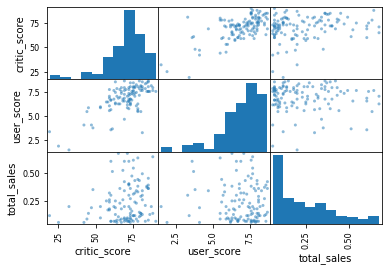

In [33]:
pd.plotting.scatter_matrix(games_scores);

Получим коэффициенты корреляции для остальных крупных платформ.

In [34]:
(
    games_subset.query(
        'platform == "XOne" & critic_score > 0 & user_score > 0 & 0.05 < total_sales < 0.63')
    .loc[:, ['critic_score', 'user_score', 'total_sales']].corr()
)

,critic_score,user_score,total_sales
critic_score,1.000000,0.583325,0.199441
user_score,0.583325,1.000000,-0.084316
total_sales,0.199441,-0.084316,1.000000


In [35]:
(
    games_subset.query(
        'platform == "3DS" & critic_score > 0 & user_score > 0 & 0.03 < total_sales < 0.25')
    .loc[:, ['critic_score', 'user_score', 'total_sales']].corr()
)

,critic_score,user_score,total_sales
critic_score,1.000000,0.708293,0.111724
user_score,0.708293,1.000000,0.339277
total_sales,0.111724,0.339277,1.000000


В целом результаты похожи на значения по платформе PS4. Ни на одной из крупнейших платформ не наблюдается значимой зависимости между продажами и оценками критиков и пользователей. 

### Анализ распределения игр по жанрам

Посмотрим на распределение продаж по жанрам при помощи сводной таблицы.

In [36]:
genres = games_subset.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count', 'median'])
genres.columns = ['total_sales', 'games_amount', 'median_sales']
genres.sort_values(by='median_sales', ascending=False)

,total_sales,games_amount,median_sales
genre,,,
Shooter,170.94,128,0.515
Sports,109.48,161,0.180
Platform,18.09,38,0.140
Fighting,28.22,60,0.125
Role-Playing,101.44,221,0.110
Simulation,13.13,44,0.100
Action,199.36,619,0.090
Misc,37.55,113,0.090
Racing,27.52,69,0.090


Т.к. количество игр каждого жанра сильно различается, корректнее будет сравнить медианный объем продаж. По этому показателю с большим отрывом лидирует жанр Shooter. Кроме того можно выделить такие жанры, как Sports, Platform, Fighting. Наименее продаваемы жанры - Adventrue, Puzzle и Strategy.

### Вывод

В данном этапе можно выделить следующие закономерности на рынке компьютерных игр:
* Расцвет индустрии приходится на 2004-2007 годы, когда стали появлятся новые платформы и выпускалось все больше игр;
* В период мирового экономического кризиса объемы выпуска перестали расти, а в последующем стали резко снижаться и по состоянию на 2016 год больше не увеличиваются;
* К 2016 году среди платформ можно выделить трех лидеров по продажам: PS4, XOne и 3DS;
* Cущественной взаимосвязи между продажами и оценками критиков или пользователей не обнаружено;
* Самые продаваемы жанры - Sports, Platform, Fighting. Наименее популярные - Adventrue, Puzzle и Strategy.

## Портрет пользователя каждого региона

В исходном датафреме представлены данные для регионов: Северная Америка, Европа и Япония.

Найдем и сравним самые популярные платформы (топ-5) в каждом регионе. Результаты представлены в сводной таблице.

In [37]:
region_pivot = games_subset.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

In [38]:
region_pivot.head()

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00


Сравнить продажи в разрезе платорм удобно при помощи круговой диаграммы. Напишем функцию pie(region, df), которая будет строить диаграмму для указанного региона. Вместо df будем подставлять сводную таблицу - продажи по платформам или жанрам и т.п.

In [39]:
def pie(region, df):
    piechart = df[region].sort_values(ascending=False).head()
    fig, ax = plt.subplots()
    ax.pie(piechart, labels=piechart.index, autopct='%1.1f%%');
    ax.axis("equal");
    ax.set_title(region.upper())

Построим круговую диаграмму для продаж в Европе в разрезе по платформам.

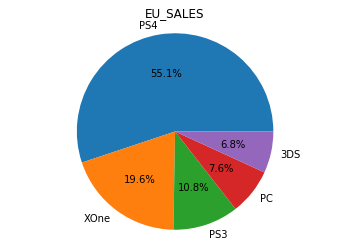

In [40]:
pie('eu_sales', region_pivot)

* Самые популярная платформа в Европе - PS4. На нее приходится чуть больше половины продаж топ-5.
* Вторая крупная платформа - XOne (19,6% продаж).
* Меньше всего продаж у 3DS (6,8%).
* Среди топ-5 платформ в Европе XOne - единственная американская платформа, остальные платформы японские.

Ниже представлена круговая диаграмма продаж по платформам в Японии.

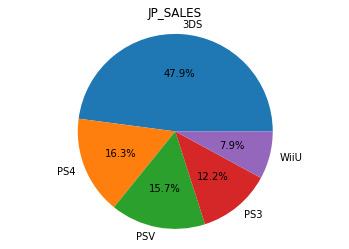

In [41]:
pie('jp_sales', region_pivot)

* Самые крупная платформа - 3DS, на нее приходится почти половина продаж из 5 лидеров. 
* Следом на близких позициях находятся PS4 и PSV.
* Все платформы из пятерки лидеров по продажам принадлежат японским компаниям.

Наконец построим диаграмму продаж в Северной Америке.

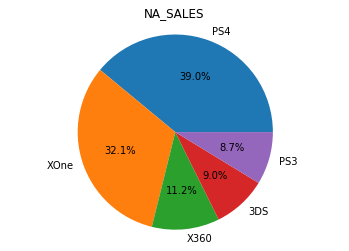

In [42]:
pie('na_sales', region_pivot)

* Основная часть продаж приходится на японскую PS4 (39%) и американскую XOne (32,1%)
* Меньше всего продаж у PS3 (8,7%)

### Анализ самых популярных жанров

Для построения круговых диаграмм по жанрам будем передавать функции pie сводную таблицу genres_pivot.
Т.к. рынок представлен разным количеством игр каждого жанра, будем сранивать медианные продажи.

In [43]:
games_subset_temp = games_subset.replace(0, np.nan) 
# временно заменим 0 на Nan, чтобы в сводной таблице медиана посчиталась без учета 0

In [44]:
genres_pivot = games_subset_temp.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='median')
genres_pivot = genres_pivot.apply(lambda x: x*1000000).astype(int)

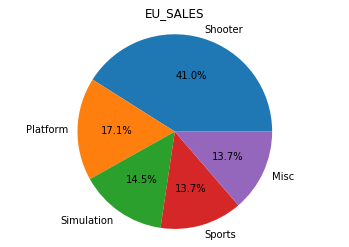

In [45]:
pie('eu_sales', genres_pivot)

В Европе жанр Shooter лидирует по продажам (41%), остальные продажи самых продаваемых жанров разделились между ними почти поровну.

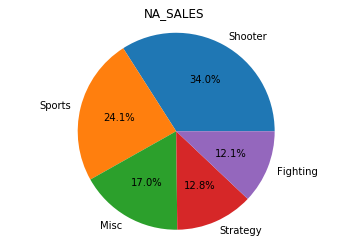

In [46]:
pie('na_sales', genres_pivot)

Самые популярные жанры в Северной Америке - Shooter и Sports.

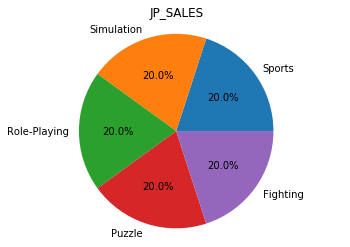

In [47]:
pie('jp_sales', genres_pivot)

В Японии топ-5 жанров в среднем продаются с  одинаковой частотой. Этот регион отличается от остальных популярностью таких жанров, как Role-Playing и Puzzle.

### Влияние рейтинга ESRB на продажи в отдельном регионе

Посомтрим, как менялись по годам продажи игр с разными рейтингами в регионах. 
График построим по аналогии с графиком продаж по платформам при помощи цикла. Чтобы построить график по очереди для разных регионов, напишем функцию, которая будет подставлять название нужного столбца в цикл. 
Мы будем рассматривать медианны продажи, т.к. количество игр каждого рейтинга отличается. Медиану будем считать только по проданным играм, чтобы наличие нулей в суммарных продажах не исказило медиану.

In [48]:
ratings = games_subset['rating'].unique()

In [49]:
def graph(column):
    for element in ratings:
        data = games_subset[(games_subset['rating'] == element) & (games_subset[column] > 0)].pivot_table(index='year_of_release', values=column, aggfunc='median')
        data.index = data.index.astype(str)
        data[column].plot(label=element, grid=True);
        plt.legend()
        plt.title('Медианные продажи по рейтингам, млн шт')

Применим функцию к столбцу 'na_sales', чтобы получить график для продаж в Северной Америке.

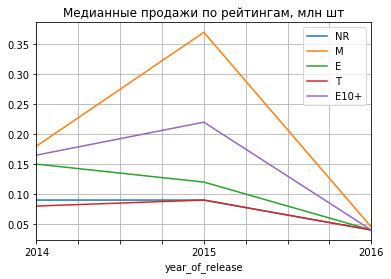

In [50]:
graph('na_sales')

Больше всего продаж приходится на игры с рейтингом M, т.е. для совершеннолетних, либо E10+ (для пользователей, старше 10 лет). Игры для подростков продаются меньше всего.

Рассмотрим график продаж в Европе.

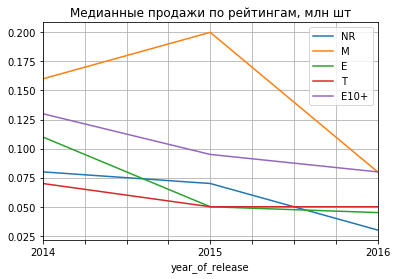

In [51]:
graph('eu_sales')

Здесь картина в целом похожа на продажи в Северной Америке. 

График продаж в Японии представлен ниже.

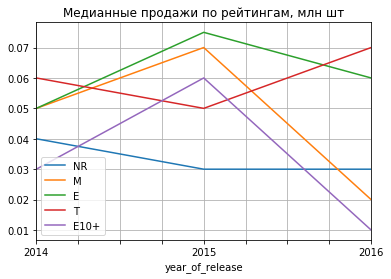

In [52]:
graph('jp_sales')

Для большей части проданных игр в Японии нет информации о рейтинге. В остальном, самые продаваемые игры не имеют возрастных ограничений, либо относятся к категории 18+. 

### Вывод

Для выбранных регионов можно составить следующий портрет:

Европа:
* Самые популярные платформы: PS4 (55,1%) и XOne (19,6% продаж);
* Меньше всего продаж у 3DS (6,8%);
* Среди топ-5 платформ в Европе XOne - единственная американская платформа, остальные платформы японские;
* В Европе жанр Shooter лидирует по продажам (41%), остальные продажи самых продаваемых жанров разделились между ними почти поровну;
* В основном продаются игры для совершеннолетних, либо для пользователей, старше 10 лет;
* Игры для подростков продаются меньше всего.

Япония:
* Самые крупная платформа - 3DS (47,9%);
* Все платформы из пятерки лидеров по продажам принадлежат японским компаниям;
* Самые продаваемые игры не имеют возрастных ограничений, либо относятся к категории 18+. 
* Этот регион отличается от остальных популярностью таких жанров, как Role-Playing и Puzzle;

Северная Америка:
* Основная часть продаж приходится на японскую PS4 (39%) и американскую XOne (32,1%);
* Меньше всего продаж у PS3 (8,7%);
* Самые популярные жанры в Северной Америке - Shooter и Sports;
* Жанр Strategy популярен только в этом регионе; 
* Больше всего продаж приходится на игры с рейтингом M и E10+.

## Проверка гипотез
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Чтобы корректно провести статистический тест для проверки гипотезы, необходимо оценить распределение значений.
Построим для каждой платформы гистограмму оценок пользователей и боксплот.

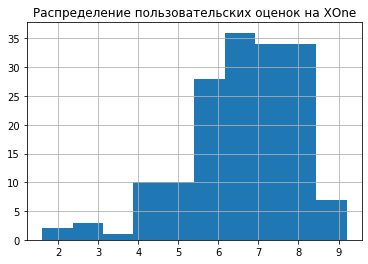

In [53]:
games_subset.query('platform == "XOne" & user_score > 0')['user_score'].hist();
plt.title('Распределение пользовательских оценок на XOne');

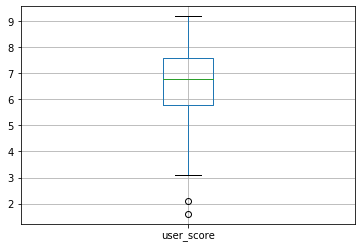

In [54]:
games_subset.query('platform == "XOne" & user_score > 0').boxplot('user_score');

Распределение напоминает нормальное, но есть несколько выбросов - оценки ниже 4 баллов встречаются крайне редко.

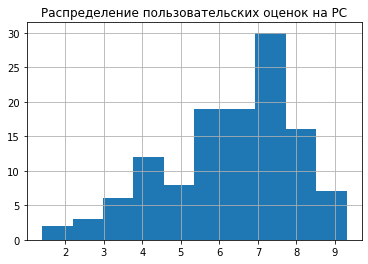

In [55]:
games_subset.query('platform == "PC" & user_score > 0')['user_score'].hist();
plt.title('Распределение пользовательских оценок на PC');

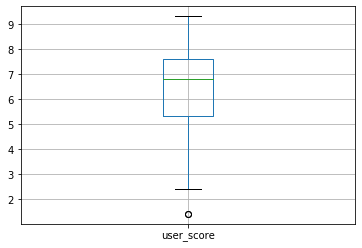

In [56]:
games_subset.query('platform == "PC" & user_score > 0').boxplot('user_score');

In [57]:
print('Дисперсия оценок на PC: {:.2f}'.format(np.var(games_subset.query('platform == "PC" & user_score > 0')['user_score'])))
print('Дисперсия оценок на XOne: {:.2f}'.format(np.var(games_subset.query('platform == "XOne" & user_score > 0')['user_score'])))

Дисперсия оценок на PC: 2.88
Дисперсия оценок на XOne: 1.88


Распределение оценок на платформе PC немного напоминает нормальное, но колокол сильно скошен вправо. Есть выбросы - редкие оценки меньше 3 баллов. 

Для проверки гипотезы t-тестом необходимо избавиться от выбросов. Поэтому сравнивать будем две выборки: оценки на XOne выше 4 баллов и оценки на PC выше 3 баллов.

Дисперсии распределение сильно отличаются - разброс значений оценок вокруг среднего на платформе PC больше, чем на XOne. Укажем параметр equal_var = False.

Для проверки данной гипотезы сформулируем нулевую и альтернативную гипотезу:
* H0: средние рейтинги игр на Xbox One и PC равны
* H1: средние рейтинги игр на Xbox One и PC отличаются

In [58]:
xone = games_subset.query('platform == "XOne" & user_score > 4')['user_score']
pc = games_subset.query('platform == "PC" & user_score > 3')['user_score']

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(xone, pc, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.17196754848344567
Не получилось отвергнуть нулевую гипотезу


Мы получили довольно большое значение p-value: 0.13. Это значит, что вероятность ошибочно отвергнуть гипотезу о равенстве средних составляет 13%. Поэтому мы предполагаем, что в действительности рейтинг пользователей не зависит от платформы, которую они используют.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Посмотрим на гистограммы распределения пользовательских оценок для жанров Action и Sports.

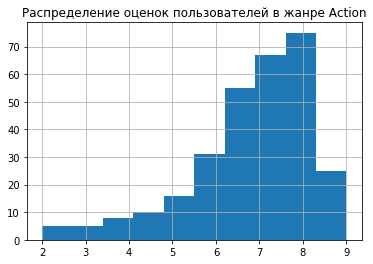

In [59]:
games_subset.query('genre == "Action" & user_score > 0')['user_score'].hist();
plt.title('Распределение оценок пользователей в жанре Action');

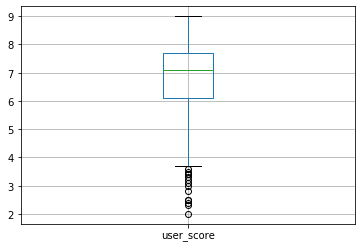

In [60]:
games_subset.query('genre == "Action" & user_score > 0').boxplot('user_score');

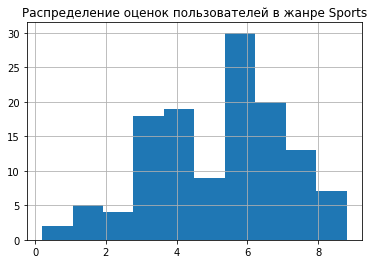

In [61]:
games_subset.query('genre == "Sports" & user_score > 0')['user_score'].hist();
plt.title('Распределение оценок пользователей в жанре Sports');

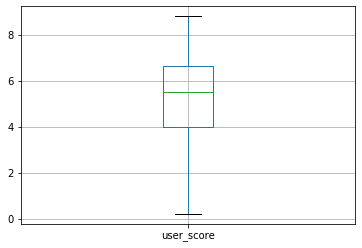

In [62]:
games_subset.query('genre == "Sports" & user_score > 0').boxplot('user_score');

In [63]:
print('Дисперсия оценок жанра Sports: {:.2f}'.format(np.var(games_subset.query('genre == "Sports" & user_score > 0')['user_score'])))
print('Дисперсия оценок жанра Action: {:.2f}'.format(np.var(games_subset.query('genre == "Action" & user_score > 0')['user_score'])))

Дисперсия оценок жанра Sports: 3.42
Дисперсия оценок жанра Action: 1.89


Оба распределения похожи на нормальные, но сильно скошены вправо, в сторону выоских оценок. Дисперсии распределений не равны, нужно будет указать параметр equal_var = False. Есть выбросы - оценки ниже 3 для Action и ниже 2,1 для Sport встречаются редко. Поэтому для t-теста возьмем соотвествующий срез данных.

Сформулируем гипотезы:
* H0: средние оценки пользователей в жанре Action и Sports равны;
* H1: средние оценки различаются.

In [64]:
action = games_subset.query('genre == "Action" & user_score > 3')['user_score']
sports = games_subset.query('genre == "Sports" & user_score > 2.1')['user_score']

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(action, sports, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.4437056186903537e-14
Отвергаем нулевую гипотезу


P-зачение получилось очень маленьким, поэтому можно с уверенностью отвергнуть нулевую гипотезу - вероятность, что такое или более сильное различие средних получено по ошибке ничтожна. Скорее всего рейтинги пользователей действительно отличаются в рассматриваемых жанрах.

## Вывод


Мы проанализировали данные о продажах компьютерных игр в разных регионах и заметили следующие закономерности:

* Жизненный цикл платформы составляет около 10 лет;
* Мировой экономический кризис привел к резкому спаду выпуска игр, который продолжается и по состоянию на 2016 год;
* К 2016 году среди платформ можно выделить трех глобальных лидеров по продажам: PS4, XOne и 3DS;
* Cущественной взаимосвязи между продажами и оценками критиков или пользователей не обнаружено;
* Самые продаваемы жанры - Sports, Platform, Fighting. Наименее популярные - Adventrue, Puzzle и Strategy.


Также мы провели статистическую проверку гипотез:
* Средние рейтинги игр на Xbox One и PC равны: данная гипотеза подтвердилась с высокой статистической значимостью. Можно предположить, что эта закономерность справедлива не только для нашей выборки, но и для генеральной совокупности в целом.
* Средние оценки пользователей в жанре Action и Sports различаются: эта гипотеза также подтвердилась и показала почти 100% вероятность того, что различия значимы. 

Исследование показало, что рынок Северной Америки и Европы похожи по предпочтениям: среди жанров лидирует Shooter, также популярен Sports (но в СА в большей степени, чем в Европе). У большей части проданных игр рейтинги E, M или T. Самые востребованные платформы - PS4 и XOne. 

В свою очередь рынок Японии сильно отличается. Самая крупная платформа - 3DS, на нее приходится примерно половина продаж из 5 лидеров. Популярные жанры продаются в одинаковой пропорции, но в отличие от других регионов популярен Role-Playing и Puzzle. Среди популярных жанров Fighting также представлен в Северной Америке, а Simulation - в Европе. Самые продаваемые игры не имеют возрастных ограничений. Эти различия и закономерности следует учесть при формировании рекламной стратегии.